# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the two most effective drugs in reducing tumor sizes.
- There is a positive correlation between average weight and tumor sizes.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
combined


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice.
mice = combined["Mouse ID"].nunique()
mice

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined.loc[combined.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate


array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined.loc[combined["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = clean_df.drop_duplicates(subset=["Mouse ID"])
clean_df = combined.loc[combined["Mouse ID"]!= "g989",:]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_df = clean_df.groupby("Drug Regimen")
mean = tumor_df["Tumor Volume (mm3)"].mean()
median = tumor_df["Tumor Volume (mm3)"].median()
var = tumor_df["Tumor Volume (mm3)"].var()
std = tumor_df["Tumor Volume (mm3)"].std()
sem = tumor_df["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
#summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Std.Dev.": std, "Tumor Volume Std. Err.": sem})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

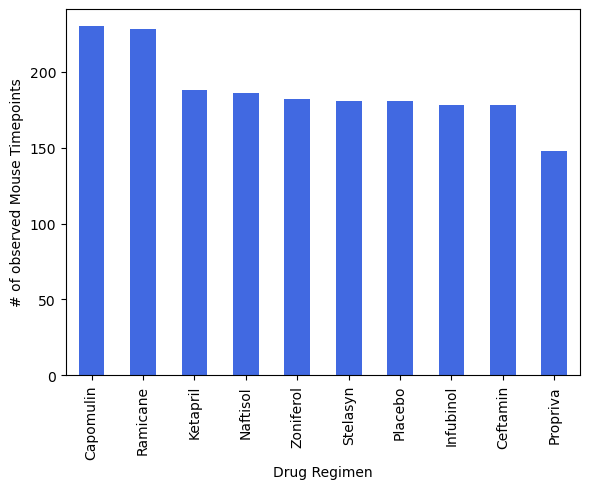

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen = clean_df['Drug Regimen'].value_counts()
drug_regimen
# Plotting the bar plot
drug_regimen.plot(kind='bar', color='royalblue', figsize=(6, 5))
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

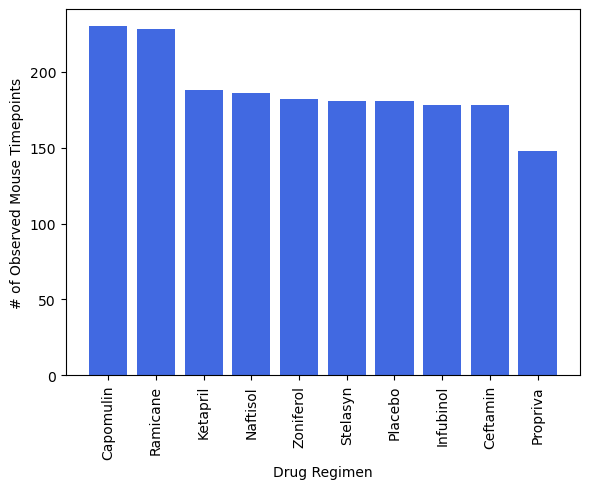

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()

# Get the drug regimens and corresponding counts
drug_names = drug_counts.index
counts = drug_counts.values

# Create the bar plot
plt.figure(figsize=(6,5))
plt.bar(drug_names, counts, color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

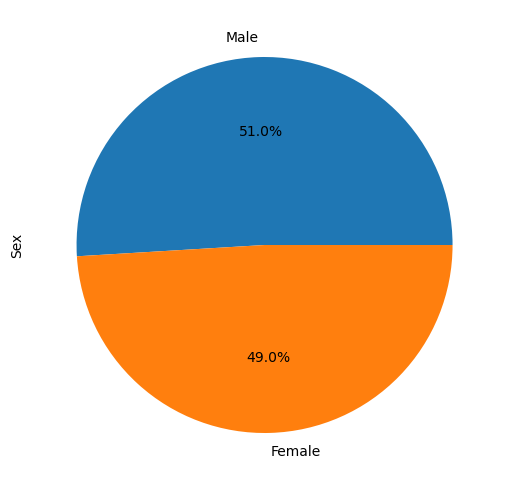

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_df['Sex'].value_counts()

mice_gender.plot(kind='pie', figsize=(6, 5), ylabel="Sex", autopct="%1.1f%%")
plt.tight_layout()
plt.show()

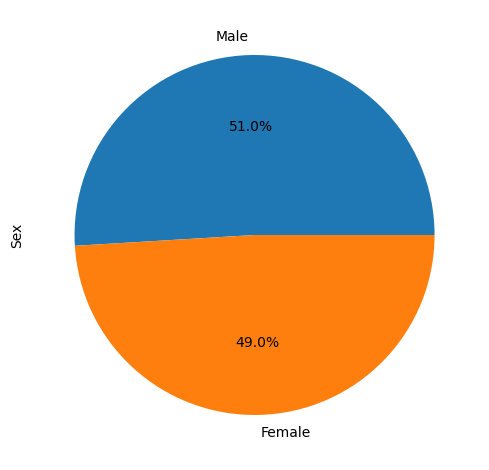

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_df['Sex'].value_counts()

# Plotting the bar plot
plt.pie(mice_gender, labels=mice_gender.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|(clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = clean_df.merge(max_tumor, on=['Mouse ID', 'Timepoint'])
#final_tumor_volumes


In [32]:

# Putting treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volume

    # add subset 

for drug in drug_list:
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    tumor_vol.append(regimen_data)

    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{drug}'s potential outliers:{outliers}, IQR is {quart_range}")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64), IQR is 7.781863460000004
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64), IQR is 9.098536719999998
Infubinol's potential outliers:29    36.321346
Name: Tumor Volume (mm3), dtype: float64, IQR is 11.477135160000003
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64), IQR is 15.577752179999997


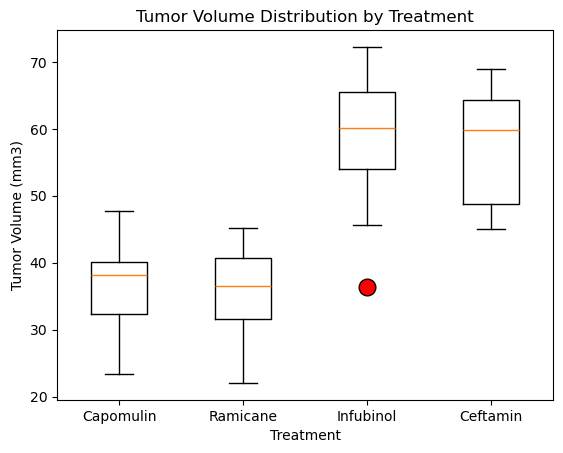

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=drug_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Treatment')
plt.show()

## Line and Scatter Plots

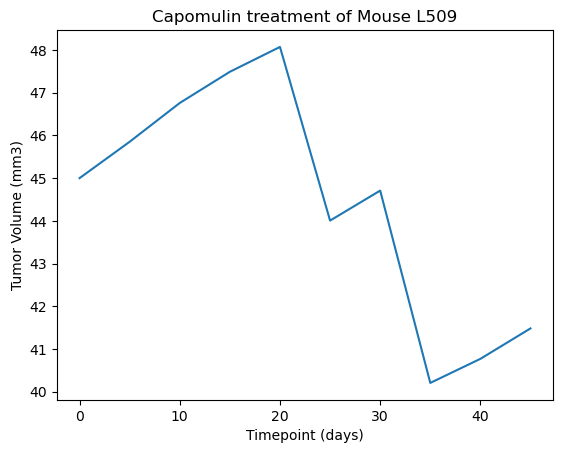

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_capomulin = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
mouse_data = clean_capomulin.loc[clean_capomulin["Mouse ID"] == "l509"]
#mouse_data
timepoints_cap = mouse_data["Timepoint"]
tumor_cap = mouse_data["Tumor Volume (mm3)"]
plt.plot(timepoints_cap, tumor_cap)
plt.title("Capomulin treatment of Mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

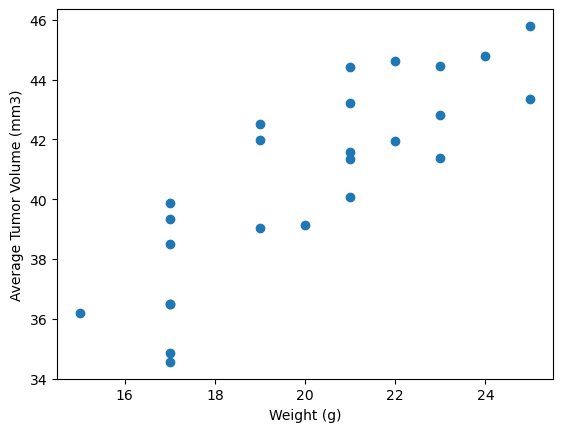

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_cap = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
weight_cap = scatter_cap.groupby("Mouse ID")["Weight (g)"].mean()
ave_tumor = scatter_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(weight_cap, ave_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor valume is 0.84


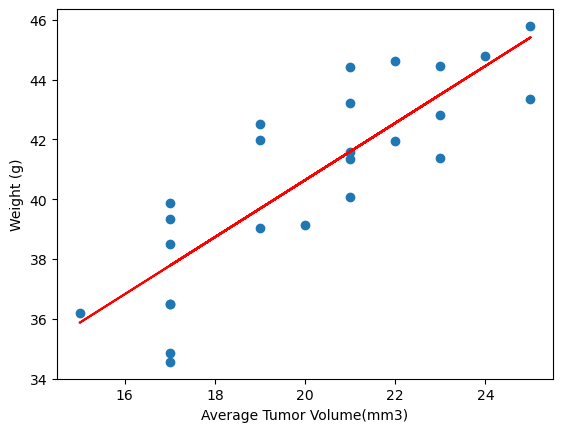

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = round(st.pearsonr(weight_cap, ave_tumor)[0],2)
print("The correlation between mouse weight and the average tumor valume is " + str(correlation_coefficient))

slope, intercept, r_value, p_value, std_err = st.linregress(weight_cap, ave_tumor)
plt.scatter(weight_cap, ave_tumor)
plt.plot(weight_cap, slope * weight_cap + intercept, label='Regression Line', color='r')
plt.xlabel("Average Tumor Volume(mm3)")
plt.ylabel("Weight (g)")
plt.show()
